# [Elogroup] Desafio de Analytics

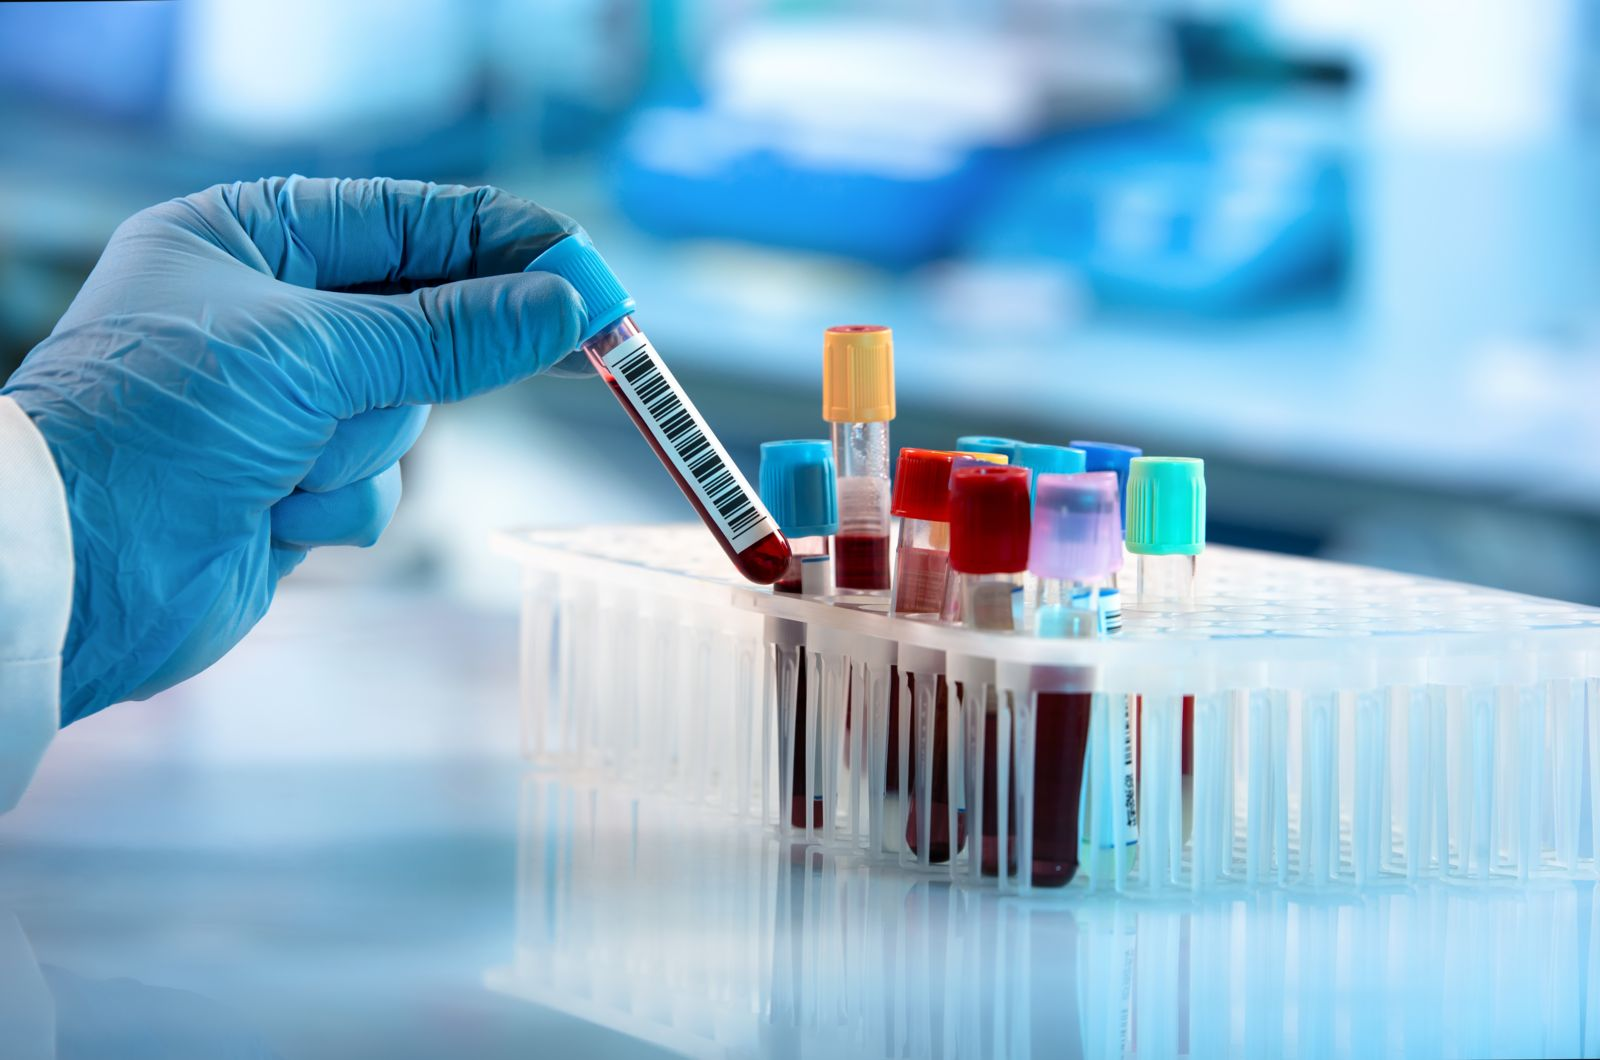

# CONTEXTUALIZAÇÃO

A medicina diagnóstica tem um papel fundamental na jornada de atendimento dos pacientes de qualquer sistema de saúde em qualquer lugar do mundo, sendo somente nos EUA um mercado de aproximadamente 106 bilhões de dólarers com mais de 40 mil laboratórios, empregando mais de 680 mil funcionários segundo a ACLA.

Diante desse cenário, o desafio proposto tem como objetivo auxiliar a área de negócios de uma rede norte americana de medicina diagnóstica a ter insumos iniciais para suportar seu plano de expansão da rede de laboratórios. Sabe-se que não é possível ou é bem difícil gerar demanda e fazer ofertas neste tipo de mercado, entretanto é muito interessante e rentável fidelizar o cliente para que ele sempre visite a rede quando surgir a necessidade.

# DESAFIO

Apresente e justifique a escolha de **TRÊS ZIP CODES** para a instalação dos novos laboratórios da rede.


# AGENDA

**1.0 IMPORTAÇÕES**    
**2.0 EXPLORAÇÃO PRIMÁRIA**   
**3.0 LIMPEZA**   
**4.0 ANÁLSE**   
**5.0 RESULTADOS**   

# 1.0 IMPORTAÇÕES

In [3]:
# importação de pacotes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

In [4]:
# importação dos datasets

df_exames = pd.read_csv("test_data.csv")
df_transacoes = pd.read_csv("transactional_data.csv", ";")
df_geocode = pd.read_csv("df_geocode.csv")
df_dados_demograficos = pd.read_csv("DemographicData_ZCTAs.csv")
df_dados_economicos = pd.read_csv("EconomicData_ZCTAs.csv")

# 2.0 EXPLORAÇÃO PRIMÁRIA

O objetivo da exploração primária é conhecer os conjuntos de dados, gerar familiaridade com eles e identificar necessidades de limpeza e transformação.

## 2.1 Exames

In [5]:
# formato do dataset
df_exames.shape

(2002, 6)

In [6]:
# colunas do dataset
list(df_exames.columns)

['CodItem', 'Desc Item', 'Category', 'Family', 'Speciality', 'Testing Cost']

In [7]:
# tipo dos dados de cada coluna
df_exames.dtypes

CodItem           int64
Desc Item        object
Category         object
Family           object
Speciality       object
Testing Cost    float64
dtype: object

In [8]:
# valores únicos em cada coluna
df_exames.nunique()

CodItem         2001
Desc Item       1997
Category           7
Family            23
Speciality        77
Testing Cost    1670
dtype: int64

In [9]:
# primeiras linhas do dataset
df_exames.head()

,CodItem,Desc Item,Category,Family,Speciality,Testing Cost
0,70003237,"MAGNESIO, SORO (EXEMPLO DE EXPRESSAO DE RESULT...",CA,CORELAB,BIOCHEMISTRY,1.78
1,70000638,"HEMOGRAMA, AUTOMATIZADO, SANGUE",CA,HEMATO,BLOOD COUNT,2.46
2,70001597,"FERRITINA, SORO",CA,CORELAB,IMMUNOHORMONE,2.11
3,70000103,"FERRO, DOSAGEM, SORO (EXEMPLO DE EXPRESSAO DE ...",CA,CORELAB,BIOCHEMISTRY,0.80
4,70000224,"CALCIO, DOSAGEM, SORO (EXEMPLO DE EXPRESSAO DE...",CA,CORELAB,BIOCHEMISTRY,1.02


In [10]:
# resumo estatístico da coluna "Testing Cost"
df_exames["Testing Cost"].describe()

count    2002.000000
mean       77.767453
std       146.066382
min         0.000000
25%         4.812500
50%        21.190000
75%        79.270000
max      1762.460000
Name: Testing Cost, dtype: float64

In [11]:
# quantidade de exames com custo zero
df_exames["Testing Cost"][df_exames["Testing Cost"] == 0].count()

7

In [12]:
# valores ausentes
df_exames.isna().sum()

CodItem         0
Desc Item       0
Category        0
Family          0
Speciality      0
Testing Cost    0
dtype: int64

In [13]:
# registros duplicados
df_exames.duplicated().sum()

0

## 2.2 Transações

In [14]:
# formato do dataset
df_transacoes.shape

(2355241, 8)

In [15]:
# colunas do dataset
list(df_transacoes.columns)

['Patient Id',
 'Gender',
 'Date of birth',
 'Date of service',
 'Service Id',
 'Lab Id',
 'CodItem',
 'Testing Cost']

In [16]:
df_transacoes.dtypes

Patient Id         object
Gender             object
Date of birth      object
Date of service    object
Service Id         object
Lab Id             object
CodItem             int64
Testing Cost       object
dtype: object

In [17]:
# valores únicos em cada coluna
df_transacoes.nunique()

Patient Id         501446
Gender                  3
Date of birth       32914
Date of service       770
Service Id         660059
Lab Id                118
CodItem              2063
Testing Cost          495
dtype: int64

In [18]:
# primeiras linhas do dataset
df_transacoes.head()

,Patient Id,Gender,Date of birth,Date of service,Service Id,Lab Id,CodItem,Testing Cost
0,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70003237,"9,0"
1,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000638,"13,0"
2,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70001597,"49,0"
3,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000103,"11,0"
4,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000224,"10,0"


In [19]:
# resumo estatístico da coluna "Testing Cost"
df_transacoes["Testing Cost"].str.replace("," , ".").astype("float64").describe()

count    2.355241e+06
mean     5.112760e+01
std      9.783094e+01
min      0.000000e+00
25%      1.100000e+01
50%      2.400000e+01
75%      4.900000e+01
max      9.500000e+03
Name: Testing Cost, dtype: float64

In [20]:
# valores de gênero
df_transacoes["Gender"].value_counts()

F    1500465
M     854766
I         10
Name: Gender, dtype: int64

In [21]:
# valores ausentes
df_transacoes.isna().sum()

Patient Id         0
Gender             0
Date of birth      1
Date of service    0
Service Id         0
Lab Id             0
CodItem            0
Testing Cost       0
dtype: int64

In [22]:
# registros duplicados
df_transacoes.duplicated().sum()

14519

## 2.3 Geocode

In [23]:
# formato do dataset
df_geocode.shape

(119, 5)

In [24]:
# colunas do dataset
list(df_exames.columns)

['CodItem', 'Desc Item', 'Category', 'Family', 'Speciality', 'Testing Cost']

In [25]:
# tipo dos dados de cada coluna
df_geocode.dtypes

Unnamed: 0      int64
Lab Id         object
Address        object
Location       object
Zipcode       float64
dtype: object

In [26]:
# valores únicos em cada coluna
df_geocode.nunique()

Unnamed: 0    119
Lab Id        119
Address       119
Location      117
Zipcode       105
dtype: int64

In [27]:
# primeiras linhas do dataset
df_geocode.head()

,Unnamed: 0,Lab Id,Address,Location,Zipcode
0,0,L152,"3800 PLEASANT HILL RD STE 1, DULUTH, GA 30096","34.000319,-84.1629724",30096.0
1,1,L520,"1614 N JAMES ST, ROME, NY 13440","43.2311327,-75.4445363",13440.0
2,2,L141,"12911 120TH AVE NE STE D60, KIRKLAND, WA 98034","47.7162786,-122.1838152",98034.0
3,3,L524,"5667 PEACHTREE DUNWOODY RD 250, ATLANTA, GA 30342","33.9093875,-84.3529096",30342.0
4,4,L545,"1204 IL HWY 164, OQUAWKA, IL 61469","40.9309925,-90.9437598",61469.0


In [28]:
# labs que estão registrados, mas que não realizaram exames

labs_sem_transacoes = []

for i in df_geocode["Lab Id"].values.tolist():
    if(i not in df_transacoes["Lab Id"].values.tolist()):
        labs_sem_transacoes.append(i)
        
pd.Series(labs_sem_transacoes).drop_duplicates()

0    L705
1    L704
dtype: object

In [29]:
# valores ausentes
df_geocode.isna().sum()

Unnamed: 0    0
Lab Id        0
Address       0
Location      0
Zipcode       1
dtype: int64

In [30]:
# registros duplicados
df_geocode.duplicated().sum()

0

## 2.4 Dados Demográficos

In [31]:
# colunas do dataset
list(df_dados_demograficos.columns)

['Unnamed: 0',
 'Id',
 'GeographicAreaName',
 'TotalPopulation',
 'SexRatio(males per 100 females)',
 'Population_Under5Years',
 'Population_5to9Years',
 'Population_10to14Years',
 'Population_15to19Years',
 'Population_20to24Years',
 'Population_25to34Years',
 'Population_35to44Years',
 'Population_45to54Years',
 'Population_55to59Years',
 'Population_60to64Years',
 'Population_65to74Years',
 'Population_75to84Years',
 'Population_85YearsAndOver',
 'MedianAgeInYears']

In [32]:
# formato do dataset
df_dados_demograficos.shape

(33120, 19)

In [33]:
# tipo dos dados de cada coluna
df_dados_demograficos.dtypes

Unnamed: 0                           int64
Id                                  object
GeographicAreaName                  object
TotalPopulation                      int64
SexRatio(males per 100 females)    float64
Population_Under5Years               int64
Population_5to9Years                 int64
Population_10to14Years               int64
Population_15to19Years               int64
Population_20to24Years               int64
Population_25to34Years               int64
Population_35to44Years               int64
Population_45to54Years               int64
Population_55to59Years               int64
Population_60to64Years               int64
Population_65to74Years               int64
Population_75to84Years               int64
Population_85YearsAndOver            int64
MedianAgeInYears                   float64
dtype: object

In [34]:
# valores únicos em cada coluna
df_dados_demograficos.nunique()

Unnamed: 0                         33120
Id                                 33120
GeographicAreaName                 33120
TotalPopulation                    15504
SexRatio(males per 100 females)     1985
Population_Under5Years              3753
Population_5to9Years                3762
Population_10to14Years              3834
Population_15to19Years              3893
Population_20to24Years              4072
Population_25to34Years              6416
Population_35to44Years              5982
Population_45to54Years              6060
Population_55to59Years              3731
Population_60to64Years              3488
Population_65to74Years              4647
Population_75to84Years              2846
Population_85YearsAndOver           1572
MedianAgeInYears                     688
dtype: int64

In [35]:
# primeiras linhas do dataset
df_dados_demograficos.head()

,Unnamed: 0,Id,GeographicAreaName,TotalPopulation,SexRatio(males per 100 females),Population_Under5Years,Population_5to9Years,Population_10to14Years,Population_15to19Years,Population_20to24Years,Population_25to34Years,Population_35to44Years,Population_45to54Years,Population_55to59Years,Population_60to64Years,Population_65to74Years,Population_75to84Years,Population_85YearsAndOver,MedianAgeInYears
0,0,8600000US35004,ZCTA5 35004,12045,94.1,805,1075,898,477,578,2088,1628,1200,886,683,1017,534,176,35.5
1,1,8600000US35005,ZCTA5 35005,7344,86.1,504,453,511,499,214,788,795,968,612,561,798,485,156,44.0
2,2,8600000US35006,ZCTA5 35006,2883,108.2,96,153,303,129,156,183,367,430,296,260,280,201,29,47.2
3,3,8600000US35007,ZCTA5 35007,26332,95.0,1936,1992,1837,1762,1376,3119,3849,3907,1665,1323,2096,1106,364,37.7
4,4,8600000US35010,ZCTA5 35010,20613,90.5,1306,1465,944,1217,1128,2513,2106,2950,1512,1472,2421,1155,424,42.6


In [36]:
# resumo estatístico das colunas numéricas
df_dados_demograficos.describe()

,Unnamed: 0,TotalPopulation,SexRatio(males per 100 females),Population_Under5Years,Population_5to9Years,Population_10to14Years,Population_15to19Years,Population_20to24Years,Population_25to34Years,Population_35to44Years,Population_45to54Years,Population_55to59Years,Population_60to64Years,Population_65to74Years,Population_75to84Years,Population_85YearsAndOver,MedianAgeInYears
count,33120.000000,33120.000000,32620.000000,33120.000000,33120.000000,33120.000000,33120.000000,33120.000000,33120.000000,33120.000000,33120.000000,33120.000000,33120.000000,33120.000000,33120.000000,33120.000000,32551.000000
mean,16559.500000,9903.343961,116.842275,601.164674,613.889312,637.866304,646.958333,671.606220,1371.989463,1249.675604,1283.429499,660.344807,613.378502,902.903895,458.470954,191.666395,42.699263
std,9561.064794,14714.043400,1483.160382,995.953840,995.199535,1025.828850,1050.850817,1236.614357,2326.202024,1993.925809,1925.116570,939.240835,857.368028,1269.069622,681.297975,312.549075,9.105954
min,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.900000
25%,8279.750000,705.750000,91.300000,31.000000,34.000000,37.000000,37.000000,30.000000,66.000000,70.000000,85.000000,52.000000,51.000000,78.000000,37.000000,10.000000,37.100000
50%,16559.500000,2801.000000,98.400000,146.000000,159.000000,173.500000,171.000000,149.000000,298.000000,313.500000,367.000000,211.000000,202.000000,303.000000,151.000000,51.000000,42.000000
75%,24839.250000,13475.250000,107.900000,744.000000,782.000000,816.250000,820.000000,782.250000,1612.000000,1593.000000,1727.250000,921.250000,867.000000,1266.000000,624.000000,242.000000,47.600000
max,33119.000000,128294.000000,265600.000000,17564.000000,14784.000000,12289.000000,13357.000000,23027.000000,28192.000000,23166.000000,18058.000000,7392.000000,7018.000000,26465.000000,16934.000000,4633.000000,98.200000


In [37]:
# valores ausentes
df_dados_demograficos.isna().sum()

Unnamed: 0                           0
Id                                   0
GeographicAreaName                   0
TotalPopulation                      0
SexRatio(males per 100 females)    500
Population_Under5Years               0
Population_5to9Years                 0
Population_10to14Years               0
Population_15to19Years               0
Population_20to24Years               0
Population_25to34Years               0
Population_35to44Years               0
Population_45to54Years               0
Population_55to59Years               0
Population_60to64Years               0
Population_65to74Years               0
Population_75to84Years               0
Population_85YearsAndOver            0
MedianAgeInYears                   569
dtype: int64

In [38]:
# registros duplicados
df_dados_demograficos.duplicated().sum()

0

## 2.5 Dados Econômicos

In [39]:
# colunas do dataset
list(df_dados_economicos.columns)

['Unnamed: 0',
 'id',
 'Geographic Area Name',
 'TotalHouseholds_LessThan$10.000',
 'TotalHouseholds_$10.000to$14.999',
 'TotalHouseholds_$15.000to$24.999',
 'TotalHouseholds_$25.000to$34.999',
 'TotalHouseholds_$35.000to$49.999',
 'TotalHouseholds_$50.000to$74.999',
 'TotalHouseholds_$75.000to$99.999',
 'TotalHouseholds_$100.000to$149.999',
 'TotalHouseholds_$150.000to$199.999',
 'TotalHouseholds_$200.000OrMore']

In [40]:
# formato do dataset
df_dados_economicos.shape

(629280, 13)

In [41]:
# tipo dos dados de cada coluna
df_dados_economicos.dtypes

Unnamed: 0                             int64
id                                    object
Geographic Area Name                  object
TotalHouseholds_LessThan$10.000        int64
TotalHouseholds_$10.000to$14.999       int64
TotalHouseholds_$15.000to$24.999       int64
TotalHouseholds_$25.000to$34.999       int64
TotalHouseholds_$35.000to$49.999       int64
TotalHouseholds_$50.000to$74.999       int64
TotalHouseholds_$75.000to$99.999       int64
TotalHouseholds_$100.000to$149.999     int64
TotalHouseholds_$150.000to$199.999     int64
TotalHouseholds_$200.000OrMore         int64
dtype: object

In [42]:
# valores únicos em cada coluna
df_dados_economicos.nunique()

Unnamed: 0                            629280
id                                     33120
Geographic Area Name                   33120
TotalHouseholds_LessThan$10.000         1989
TotalHouseholds_$10.000to$14.999        1479
TotalHouseholds_$15.000to$24.999        2387
TotalHouseholds_$25.000to$34.999        2341
TotalHouseholds_$35.000to$49.999        2900
TotalHouseholds_$50.000to$74.999        3697
TotalHouseholds_$75.000to$99.999        2963
TotalHouseholds_$100.000to$149.999      3550
TotalHouseholds_$150.000to$199.999      2212
TotalHouseholds_$200.000OrMore          2640
dtype: int64

In [43]:
# primeiras linhas do dataset
df_dados_economicos.head()

,Unnamed: 0,id,Geographic Area Name,TotalHouseholds_LessThan$10.000,TotalHouseholds_$10.000to$14.999,TotalHouseholds_$15.000to$24.999,TotalHouseholds_$25.000to$34.999,TotalHouseholds_$35.000to$49.999,TotalHouseholds_$50.000to$74.999,TotalHouseholds_$75.000to$99.999,TotalHouseholds_$100.000to$149.999,TotalHouseholds_$150.000to$199.999,TotalHouseholds_$200.000OrMore
0,0,8600000US35004,ZCTA5 35004,198,71,298,513,647,1117,529,945,245,61
1,1,8600000US35005,ZCTA5 35005,188,184,318,293,353,562,299,407,67,26
2,2,8600000US35006,ZCTA5 35006,71,20,117,104,154,176,124,194,51,7
3,3,8600000US35007,ZCTA5 35007,396,208,670,462,1173,1854,1578,2224,473,254
4,4,8600000US35010,ZCTA5 35010,700,610,1093,957,1056,1512,807,749,254,249


In [44]:
df_dados_economicos.describe()

,Unnamed: 0,TotalHouseholds_LessThan$10.000,TotalHouseholds_$10.000to$14.999,TotalHouseholds_$15.000to$24.999,TotalHouseholds_$25.000to$34.999,TotalHouseholds_$35.000to$49.999,TotalHouseholds_$50.000to$74.999,TotalHouseholds_$75.000to$99.999,TotalHouseholds_$100.000to$149.999,TotalHouseholds_$150.000to$199.999,TotalHouseholds_$200.000OrMore
count,629280.000000,629280.000000,629280.000000,629280.000000,629280.000000,629280.000000,629280.000000,629280.000000,629280.000000,629280.000000,629280.000000
mean,314639.500000,230.234903,160.920380,331.454771,330.243810,451.798581,631.313194,465.690791,553.135386,247.101238,280.055707
std,181657.633035,441.467545,276.893133,520.917773,503.567121,673.905420,927.015415,696.950905,888.368115,469.367588,684.806531
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,157319.750000,11.000000,9.000000,25.000000,25.000000,36.000000,49.000000,31.000000,29.000000,6.000000,3.000000
50%,314639.500000,55.000000,45.000000,98.000000,100.000000,139.000000,195.000000,137.000000,135.000000,40.000000,29.000000
75%,471959.250000,257.000000,188.000000,415.000000,416.000000,578.000000,831.000000,611.000000,681.250000,254.000000,202.000000
max,629279.000000,7901.000000,3942.000000,5410.000000,4349.000000,5988.000000,8466.000000,6491.000000,8705.000000,6095.000000,11968.000000


In [45]:
# valores ausentes
df_dados_economicos.isna().sum()

Unnamed: 0                            0
id                                    0
Geographic Area Name                  0
TotalHouseholds_LessThan$10.000       0
TotalHouseholds_$10.000to$14.999      0
TotalHouseholds_$15.000to$24.999      0
TotalHouseholds_$25.000to$34.999      0
TotalHouseholds_$35.000to$49.999      0
TotalHouseholds_$50.000to$74.999      0
TotalHouseholds_$75.000to$99.999      0
TotalHouseholds_$100.000to$149.999    0
TotalHouseholds_$150.000to$199.999    0
TotalHouseholds_$200.000OrMore        0
dtype: int64

In [46]:
# registros duplicados
df_dados_economicos.duplicated().sum()

0

# 3.0 LIMPEZA

O objetivo desta etapa é realizar as limpezas necessárias nos conjuntos de dados para prepará-los para a etapa de análise.

## 3.1 Exames

In [47]:
# cópia do dataset original para realizar o processo de limpeza
df_exames_limpo = df_exames.copy()

In [48]:
# transformação da variável "CodItem" para o tipo object
df_exames_limpo["CodItem"] = df_exames_limpo["CodItem"].astype(object)

In [204]:
# renomear colunas
df_exames_limpo = df_exames_limpo.rename(columns = {"CodItem":"Cod_Exame", "Desc Item":"Desc_Exame", "Category":"Categoria", "Family":"Família", "Speciality":"Especialidade", "Testing Cost":"Custo"})

In [205]:
df_exames_limpo.head()

,Cod_Exame,Desc_Exame,Categoria,Família,Especialidade,Custo
0,70003237,"MAGNESIO, SORO (EXEMPLO DE EXPRESSAO DE RESULT...",CA,CORELAB,BIOCHEMISTRY,1.78
1,70000638,"HEMOGRAMA, AUTOMATIZADO, SANGUE",CA,HEMATO,BLOOD COUNT,2.46
2,70001597,"FERRITINA, SORO",CA,CORELAB,IMMUNOHORMONE,2.11
3,70000103,"FERRO, DOSAGEM, SORO (EXEMPLO DE EXPRESSAO DE ...",CA,CORELAB,BIOCHEMISTRY,0.80
4,70000224,"CALCIO, DOSAGEM, SORO (EXEMPLO DE EXPRESSAO DE...",CA,CORELAB,BIOCHEMISTRY,1.02


## 3.2 Geocode

In [143]:
# cópia do dataset original para realizar o processo de limpeza
df_geocode_limpo = df_geocode.copy()

In [144]:
# remover primeira coluna
df_geocode_limpo.drop("Unnamed: 0", axis = 1, inplace = True);

In [145]:
# visualizar registro com valores ausente
df_geocode_limpo[df_geocode_limpo["Zipcode"].isna()]

,Lab Id,Address,Location,Zipcode
83,-2,Unavailable,Unavailable,NaN


In [146]:
# remover registro com valores ausente
df_geocode_limpo.dropna(inplace = True)
df_geocode_limpo.reset_index(drop = True, inplace = True)

In [147]:
# transformação da variável "Zipcode" para o tipo object
df_geocode_limpo["Zipcode"] = df_geocode_limpo["Zipcode"].astype(np.int64).astype(object)

In [148]:
# visualizar zipcodes fora do padrão de tamanho (5 dígitos)
zipcodes_incorretos = [x for x in df_geocode_limpo["Zipcode"].astype(str) if len(x) != 5]
zipcodes_incorretos

['9134',
 '1840',
 '8109',
 '2359',
 '1605',
 '8108',
 '2762',
 '1844',
 '3054',
 '2190',
 '9107',
 '1702',
 '1606',
 '3087',
 '1950',
 '3079',
 '3087',
 '2019',
 '2169',
 '1701',
 '8002']

In [150]:
# extrair zipcodes do endereço e substituir os valores da coluna "Zipcode"
df_geocode_limpo["Zipcode"] = df_geocode_limpo["Address"].apply(lambda x: x.split(" ")[-1])

In [151]:
# visualizar zipcodes corrigidos
zipcodes_incorretos_2 = [x for x in df_geocode_limpo["Zipcode"].astype(str) if len(x) != 5]
zipcodes_incorretos_2

['19134\n', '19107\n']

In [152]:
# corrigir zipcodes restantes 
df_geocode_limpo.loc[df_geocode_limpo[df_geocode_limpo["Zipcode"] == "19134\n"].index[0], "Zipcode"] = "19134"
df_geocode_limpo.loc[df_geocode_limpo[df_geocode_limpo["Zipcode"] == "19107\n"].index[0], "Zipcode"] = "19107"

[x for x in df_geocode_limpo["Zipcode"].astype(str) if len(x) != 5]

[]

In [208]:
# renomear colunas
df_geocode_limpo = df_geocode_limpo.rename(columns = {"Lab Id":"Id_Lab","Address":"Endereço", "Location":"Localização"})

In [209]:
df_geocode_limpo.head()

,Id_Lab,Endereço,Localização,Zipcode
0,L152,"3800 PLEASANT HILL RD STE 1, DULUTH, GA 30096","34.000319,-84.1629724",30096
1,L520,"1614 N JAMES ST, ROME, NY 13440","43.2311327,-75.4445363",13440
2,L141,"12911 120TH AVE NE STE D60, KIRKLAND, WA 98034","47.7162786,-122.1838152",98034
3,L524,"5667 PEACHTREE DUNWOODY RD 250, ATLANTA, GA 30342","33.9093875,-84.3529096",30342
4,L545,"1204 IL HWY 164, OQUAWKA, IL 61469","40.9309925,-90.9437598",61469


## 3.3 Transações

In [163]:
# cópia do dataset original para realizar o processo de limpeza
df_transacoes_limpo = df_transacoes.copy()

In [164]:
# transformação da variável "CodItem" para o tipo object
df_transacoes_limpo["CodItem"] = df_transacoes_limpo["CodItem"].astype(object)

In [165]:
# transformação da variável "Date of birth" para o tipo datetime64
df_transacoes_limpo["Date of birth"] = pd.to_datetime(df_transacoes_limpo["Date of birth"])

In [166]:
# transformação da variável "Date of service" para o tipo datetime64
df_transacoes_limpo["Date of service"] = pd.to_datetime(df_transacoes_limpo["Date of service"])

In [167]:
# substituir "," por "." em "Testing Cost"
df_transacoes_limpo["Testing Cost"] = df_transacoes_limpo["Testing Cost"].str.replace("," , ".")

In [168]:
# transformação da variável "Testing Cost" para o tipo float64
df_transacoes_limpo["Testing Cost"] = df_transacoes_limpo["Testing Cost"].astype("float64")

In [169]:
df_transacoes_limpo.dtypes

Patient Id                 object
Gender                     object
Date of birth      datetime64[ns]
Date of service    datetime64[ns]
Service Id                 object
Lab Id                     object
CodItem                    object
Testing Cost              float64
dtype: object

In [170]:
# remover registros onde "Gender" == I -> quantidade muito pequena, não contribuirá para a análise
df_transacoes_limpo["Gender"] = df_transacoes_limpo["Gender"][df_transacoes_limpo["Gender"] != "I"]

df_transacoes_limpo["Gender"].value_counts()

F    1500465
M     854766
Name: Gender, dtype: int64

In [173]:
# verificar a quantidade de exames diferentes nos datasets de exames e trasações -> 62 tipos de exames realizados que não
# estão registrados no conjunto de dados de exames

print("Exames realizados: %i" % df_transacoes_limpo["CodItem"].nunique())
print("Exames cadastados: %i" % df_exames_limpo["CodItem"].nunique())

Exames realizados: 2063
Exames cadastados: 2001


In [171]:
# verificar quantidade de transações com exames não registrados

exames_nao_registrados = []

for i in df_transacoes_limpo["CodItem"].values.tolist():
    if(i not in df_exames_limpo["CodItem"].values.tolist()):
        exames_nao_registrados.append(i)

In [174]:
# 316 trasações realizadas com exames não registrados -> remover estes registros
pd.Series(exames_nao_registrados).size

316

In [175]:
# remover registros de exames realidados não registrados

index = 0
registros_removidos = 0

for i in df_transacoes_limpo["CodItem"].values.tolist():
    if(i not in df_exames_limpo["CodItem"].values.tolist()):
        df_transacoes_limpo.drop(index = index, inplace = True)
        registros_removidos += 1
    index += 1
df_transacoes_limpo.reset_index(drop = True, inplace = True)
       
print ("%s registros removidos" % registros_removidos)

316 registros removidos


In [176]:
# verificar labs que realizaram exames, mas que não estão cadastrados

labs_nao_cadastrados = []

for i in df_transacoes_limpo["Lab Id"].values.tolist():
    if(i not in df_geocode_limpo["Lab Id"].values.tolist()):
        labs_nao_cadastrados.append(i)

In [177]:
# verificar quais labs realizaram exames, mas não estão cadastrados
pd.Series(labs_nao_cadastrados).drop_duplicates()

0       -2
13    L665
dtype: object

In [178]:
# verificar quantidade de registros de labs que realizaram exames, mas não estão cadastrados
len(labs_nao_cadastrados)

1623

In [180]:
# remover registros de exames realidados por labs não registrados

index = 0
registros_removidos = 0

for i in df_transacoes_limpo["Lab Id"].values.tolist():
    if(i not in df_geocode_limpo["Lab Id"].values.tolist()):
        df_transacoes_limpo.drop(index = index, inplace = True)
        registros_removidos += 1
    index += 1
    
df_transacoes_limpo.reset_index(drop = True, inplace = True)
      
print ("%s registros removidos" % registros_removidos)

1623 registros removidos


In [181]:
# remover registros duplicados
df_transacoes_limpo.drop_duplicates(inplace = True)
df_transacoes_limpo.reset_index(drop = True, inplace = True)

In [182]:
# remapear preços df_exames -> df_transacoes

fix_cost = df_exames_limpo[["CodItem", "Testing Cost"]]

df_transacoes_limpo = df_transacoes_limpo = df_transacoes_limpo.drop(["Testing Cost"], axis = 1).merge(fix_cost, how = "left", on = "CodItem")

In [183]:
# remover registros com valores ausentes
df_transacoes_limpo.dropna(inplace = True)
df_transacoes_limpo.reset_index(drop = True, inplace = True);

In [210]:
# renomear colunas
df_transacoes_limpo = df_transacoes_limpo.rename(columns = {"Patient Id":"Id_Paciente", "Gender":"Gênero", "Date of birth":"Data_Nascimento", "Date of service":"Data_Serviço", "Service Id":"Id_Serviço", "Lab Id":"Id_Lab", "CodItem":"Cod_Exame", "Testing Cost":"Custo"})

In [211]:
df_transacoes_limpo.head()

,Id_Paciente,Gênero,Data_Nascimento,Data_Serviço,Id_Serviço,Id_Lab,Cod_Exame,Custo
0,10210830256-BIO003,F,1976-01-08,2019-01-07,571904533475-38,L133,70003237,1.78
1,10210830256-BIO003,F,1976-01-08,2019-01-07,571904533475-38,L133,70000638,2.46
2,10210830256-BIO003,F,1976-01-08,2019-01-07,571904533475-38,L133,70001597,2.11
3,10210830256-BIO003,F,1976-01-08,2019-01-07,571904533475-38,L133,70000103,0.80
4,10210830256-BIO003,F,1976-01-08,2019-01-07,571904533475-38,L133,70000224,1.02


## 3.4 Dados Demográficos

In [213]:
# cópia do dataset original para realizar o processo de limpeza
df_dados_demograficos_limpo = df_dados_demograficos.copy()

In [214]:
# remover primeira coluna
df_dados_demograficos_limpo.drop("Unnamed: 0", axis = 1, inplace = True)

In [215]:
# remover valores ausentes
df_dados_demograficos_limpo.dropna(inplace = True)

In [218]:
df_dados_demograficos_limpo = df_dados_demograficos_limpo.rename(columns = {"Id":"Id_Região", "GeographicAreaName":"Área_Geográfica", "TotalPopulation":"População_Total", "SexRatio(males per 100 females)":"Homens_por_100_mulheres", "Population_Under5Years":"Menos_de_5_Anos", "Population_5to9Years":"5-9_Anos", "Population_10to14Years":"10-14_Anos" , "Population_15to19Years":"15-19_Anos", "Population_20to24Years":"20-24_Anos", "Population_25to34Years":"25-34_Anos", "Population_35to44Years":"35-44_Anos", "Population_45to54Years":"45-54_Anos", "Population_55to59Years":"55-59_Anos", "Population_60to64Years":"60-64_Anos", "Population_65to74Years":"65-74_Anos", "Population_75to84Years":"75-84_Anos", "Population_85YearsAndOver":"Mais_de_84_Anos", "MedianAgeInYears":"Idade_Mediana"})

In [219]:
df_dados_demograficos_limpo.head()

,Id_Região,Área_Geográfica,População_Total,Homens_por_100_mulheres,Menos_de_5_Anos,5-9_Anos,10-14_Anos,15-19_Anos,20-24_Anos,25-34_Anos,35-44_Anos,45-54_Anos,55-59_Anos,60-64_Anos,65-74_Anos,75-84_Anos,Mais_de_84_Anos,Idade_Mediana
0,8600000US35004,ZCTA5 35004,12045,94.1,805,1075,898,477,578,2088,1628,1200,886,683,1017,534,176,35.5
1,8600000US35005,ZCTA5 35005,7344,86.1,504,453,511,499,214,788,795,968,612,561,798,485,156,44.0
2,8600000US35006,ZCTA5 35006,2883,108.2,96,153,303,129,156,183,367,430,296,260,280,201,29,47.2
3,8600000US35007,ZCTA5 35007,26332,95.0,1936,1992,1837,1762,1376,3119,3849,3907,1665,1323,2096,1106,364,37.7
4,8600000US35010,ZCTA5 35010,20613,90.5,1306,1465,944,1217,1128,2513,2106,2950,1512,1472,2421,1155,424,42.6


## 3.5 Dados Econômicos

In [283]:
# cópia do dataset original para realizar o processo de limpeza
df_dados_economicos_limpo = df_dados_economicos.copy()

In [284]:
# remover primeira coluna
df_dados_economicos_limpo.drop("Unnamed: 0", axis = 1, inplace = True)

In [285]:
df_dados_economicos_limpo.columns

Index(['id', 'Geographic Area Name', 'TotalHouseholds_LessThan$10.000',
       'TotalHouseholds_$10.000to$14.999', 'TotalHouseholds_$15.000to$24.999',
       'TotalHouseholds_$25.000to$34.999', 'TotalHouseholds_$35.000to$49.999',
       'TotalHouseholds_$50.000to$74.999', 'TotalHouseholds_$75.000to$99.999',
       'TotalHouseholds_$100.000to$149.999',
       'TotalHouseholds_$150.000to$199.999', 'TotalHouseholds_$200.000OrMore'],
      dtype='object')

In [286]:
df_dados_economicos_limpo = df_dados_economicos_limpo.rename(columns = {"id":"Id_Região", "Geographic Area Name":"Área_Geográfica", "TotalHouseholds_LessThan$10.000":"Menos_de_$10.000", "TotalHouseholds_$10.000to$14.999":"$10.000-$14.999", "TotalHouseholds_$15.000to$24.999":"$15.000-$24.999", "TotalHouseholds_$25.000to$34.999":"$25.000-$34.999", "TotalHouseholds_$35.000to$49.999":"$35.000-$49.999", "TotalHouseholds_$50.000to$74.999":"$50.000-$74.999", "TotalHouseholds_$75.000to$99.999":"$75.000-$99.999", "TotalHouseholds_$100.000to$149.999":"$100.000-$149.999", "TotalHouseholds_$150.000to$199.999":"$150.000-$199.999", "TotalHouseholds_$200.000OrMore":"Mais_de_$200.000"})

In [287]:
df_dados_economicos_limpo.head()

,Id_Região,Área_Geográfica,Menos_de_$10.000,$10.000-$14.999,$15.000-$24.999,$25.000-$34.999,$35.000-$49.999,$50.000-$74.999,$75.000-$99.999,$100.000-$149.999,$150.000-$199.999,Mais_de_$200.000
0,8600000US35004,ZCTA5 35004,198,71,298,513,647,1117,529,945,245,61
1,8600000US35005,ZCTA5 35005,188,184,318,293,353,562,299,407,67,26
2,8600000US35006,ZCTA5 35006,71,20,117,104,154,176,124,194,51,7
3,8600000US35007,ZCTA5 35007,396,208,670,462,1173,1854,1578,2224,473,254
4,8600000US35010,ZCTA5 35010,700,610,1093,957,1056,1512,807,749,254,249


## 3.6 Salvamento em disco

In [289]:
# salvar datasets limpos em disco

df_exames_limpo.to_csv("df_exames_limpo.csv")
df_transacoes_limpo.to_csv("df_transacoes_limpo.csv")
df_geocode_limpo.to_csv("df_geocode_limpo.csv")
df_dados_demograficos_limpo.to_csv("df_dados_demograficos_limpo.csv")
df_dados_economicos_limpo.to_csv("df_dados_economicos_limpo.csv")

# 4.0 ANÁLISE

In [361]:
# calcular a receita total de cada laboratório durante o período

df_analise = df_transacoes_limpo.groupby(by = ["Id_Lab"]).sum().sort_values(by = "Id_Lab").reset_index(drop = False).rename(columns = {"Custo":"Receita_Total"})
df_analise.head()

,Id_Lab,Receita_Total
0,L058,244243.52
1,L060,60521.58
2,L061,1245484.24
3,L063,99109.94
4,L064,43511.29


In [362]:
# adicionar coluna de Zipcodes

df_analise = df_analise.merge(df_geocode_limpo[["Id_Lab", "Zipcode"]])
df_analise["Zipcode"] = df_analise["Zipcode"].astype(str).str.strip()
df_analise.head()

,Id_Lab,Receita_Total,Zipcode
0,L058,244243.52,19148
1,L060,60521.58,98004
2,L061,1245484.24,98004
3,L063,99109.94,61201
4,L064,43511.29,30012


In [363]:
# adicionar dados demográficos

df_dados_demograficos_limpo["Zipcode"] = df_dados_demograficos_limpo["Área_Geográfica"].apply(lambda x: x.split(" ")[1].strip())

df_analise = df_analise.merge(df_dados_demograficos_limpo, on = "Zipcode", how = "left")
df_analise.drop(columns = ["Id_Região", "Área_Geográfica"], inplace = True)
df_analise.head()

,Id_Lab,Receita_Total,Zipcode,População_Total,Homens_por_100_mulheres,Menos_de_5_Anos,5-9_Anos,10-14_Anos,15-19_Anos,20-24_Anos,25-34_Anos,35-44_Anos,45-54_Anos,55-59_Anos,60-64_Anos,65-74_Anos,75-84_Anos,Mais_de_84_Anos,Idade_Mediana
0,L058,244243.52,19148,52259,98.3,3521,3106,2845,1978,2163,11318,7809,6032,2958,3076,3659,2502,1292,36.4
1,L060,60521.58,98004,36202,105.3,1692,1450,1958,1343,1836,8340,5246,5095,2201,1753,2597,1762,929,37.8
2,L061,1245484.24,98004,36202,105.3,1692,1450,1958,1343,1836,8340,5246,5095,2201,1753,2597,1762,929,37.8
3,L063,99109.94,61201,38024,95.3,2422,2156,2255,3552,3415,4755,4153,4106,2532,2503,3343,1902,930,36.0
4,L064,43511.29,30012,28591,85.1,1894,1800,2690,2266,1901,3810,4040,3129,1883,1409,2085,1085,599,34.9


In [364]:
# adicionar dados econômicos

df_dados_economicos_limpo["Zipcode"] = df_dados_demograficos_limpo["Área_Geográfica"].apply(lambda x: x.split(" ")[1].strip())

df_analise = df_analise.merge(df_dados_economicos_limpo, on = "Zipcode", how = "left")
df_analise.drop(columns = ["Id_Região", "Área_Geográfica"], inplace = True)
df_analise = df_analise.set_index("Id_Lab")
df_analise.head()

,Receita_Total,Zipcode,População_Total,Homens_por_100_mulheres,Menos_de_5_Anos,5-9_Anos,10-14_Anos,15-19_Anos,20-24_Anos,25-34_Anos,...,Menos_de_$10.000,$10.000-$14.999,$15.000-$24.999,$25.000-$34.999,$35.000-$49.999,$50.000-$74.999,$75.000-$99.999,$100.000-$149.999,$150.000-$199.999,Mais_de_$200.000
Id_Lab,,,,,,,,,,,,,,,,,,,,,
L058,244243.52,19148,52259,98.3,3521,3106,2845,1978,2163,11318,...,1660,912,2010,2428,2378,3431,2338,2317,996,791
L060,60521.58,98004,36202,105.3,1692,1450,1958,1343,1836,8340,...,629,285,517,468,879,1499,1744,3324,2146,5579
L061,1245484.24,98004,36202,105.3,1692,1450,1958,1343,1836,8340,...,629,285,517,468,879,1499,1744,3324,2146,5579
L063,99109.94,61201,38024,95.3,2422,2156,2255,3552,3415,4755,...,1451,1022,1523,1577,2407,2970,1707,2046,575,269
L064,43511.29,30012,28591,85.1,1894,1800,2690,2266,1901,3810,...,698,459,1259,1389,1361,1963,1105,1016,219,463


In [366]:
# agrupar as faixas etárias em jovens, adultos e idosos

df_analise["Jovens"] = df_analise["Menos_de_5_Anos"] + df_analise["5-9_Anos"] + df_analise["10-14_Anos"] + df_analise["15-19_Anos"]

df_analise["Adultos"] = df_analise["20-24_Anos"] + df_analise["25-34_Anos"] + df_analise["35-44_Anos"] + df_analise["45-54_Anos"] + df_analise["55-59_Anos"]

df_analise["Idosos"] = df_analise["60-64_Anos"] + df_analise["65-74_Anos"] + df_analise["75-84_Anos"] + df_analise["Mais_de_84_Anos"]

df_analise.drop(columns = ['Menos_de_5_Anos', '5-9_Anos', '10-14_Anos', '15-19_Anos', '20-24_Anos', '25-34_Anos', '35-44_Anos', '45-54_Anos', '55-59_Anos', '60-64_Anos', '65-74_Anos', '75-84_Anos', 'Mais_de_84_Anos'], inplace = True)

In [367]:
# proporção de jovens, adultos e idosos

df_analise["%Jovens"] = df_analise["Jovens"] / (df_analise["Jovens"] + df_analise["Adultos"] + df_analise["Idosos"])

df_analise["%Adultos"] = df_analise["Adultos"] / (df_analise["Jovens"] + df_analise["Adultos"] + df_analise["Idosos"])

df_analise["%Idosos"] = df_analise["Idosos"] / (df_analise["Jovens"] + df_analise["Adultos"] + df_analise["Idosos"])

df_analise.drop(columns = ["Jovens", "Adultos", "Idosos"], inplace = True)

In [368]:
# agrupar faixa de renda em classes

df_analise["Classe_A"] = df_analise["$150.000-$199.999"] + df_analise["Mais_de_$200.000"]

df_analise["Classe_B"] = df_analise["$75.000-$99.999"] + df_analise["$100.000-$149.999"]

df_analise["Classe_C"] = df_analise["$35.000-$49.999"] + df_analise["$50.000-$74.999"]

df_analise["Classe_D"] = df_analise["Menos_de_$10.000"] + df_analise["$10.000-$14.999"] + df_analise["$15.000-$24.999"] + df_analise["$25.000-$34.999"]

df_analise.drop(columns = ["Menos_de_$10.000", "$10.000-$14.999", "$15.000-$24.999", "$25.000-$34.999", "$35.000-$49.999", "$50.000-$74.999", "$75.000-$99.999", "$100.000-$149.999", "$150.000-$199.999", "Mais_de_$200.000"], inplace = True)

In [369]:
# proporção de classes

df_analise["%Classe_A"] = df_analise["Classe_A"] / (df_analise["Classe_A"] + df_analise["Classe_B"] + df_analise["Classe_C"] + df_analise["Classe_D"]) 

df_analise["%Classe_B"] = df_analise["Classe_B"] / (df_analise["Classe_A"] + df_analise["Classe_B"] + df_analise["Classe_C"] + df_analise["Classe_D"])

df_analise["%Classe_C"] = df_analise["Classe_C"] / (df_analise["Classe_A"] + df_analise["Classe_B"] + df_analise["Classe_C"] + df_analise["Classe_D"])

df_analise["%Classe_D"] = df_analise["Classe_D"] / (df_analise["Classe_A"] + df_analise["Classe_B"] + df_analise["Classe_C"] + df_analise["Classe_D"])

df_analise.drop(columns = ["Classe_A", "Classe_B", "Classe_C", "Classe_D"], inplace = True)

In [370]:
df_analise.head()

,Receita_Total,Zipcode,População_Total,Homens_por_100_mulheres,Idade_Mediana,%Jovens,%Adultos,%Idosos,%Classe_A,%Classe_B,%Classe_C,%Classe_D
Id_Lab,,,,,,,,,,,,
L058,244243.52,19148,52259,98.3,36.4,0.219101,0.579422,0.201477,0.092778,0.241680,0.301594,0.363948
L060,60521.58,98004,36202,105.3,37.8,0.177974,0.627534,0.194492,0.452548,0.296895,0.139309,0.111248
L061,1245484.24,98004,36202,105.3,37.8,0.177974,0.627534,0.194492,0.452548,0.296895,0.139309,0.111248
L063,99109.94,61201,38024,95.3,36.0,0.273117,0.498659,0.228224,0.054287,0.241397,0.345855,0.358461
L064,43511.29,30012,28591,85.1,34.9,0.302543,0.516351,0.181106,0.068667,0.213552,0.334676,0.383105


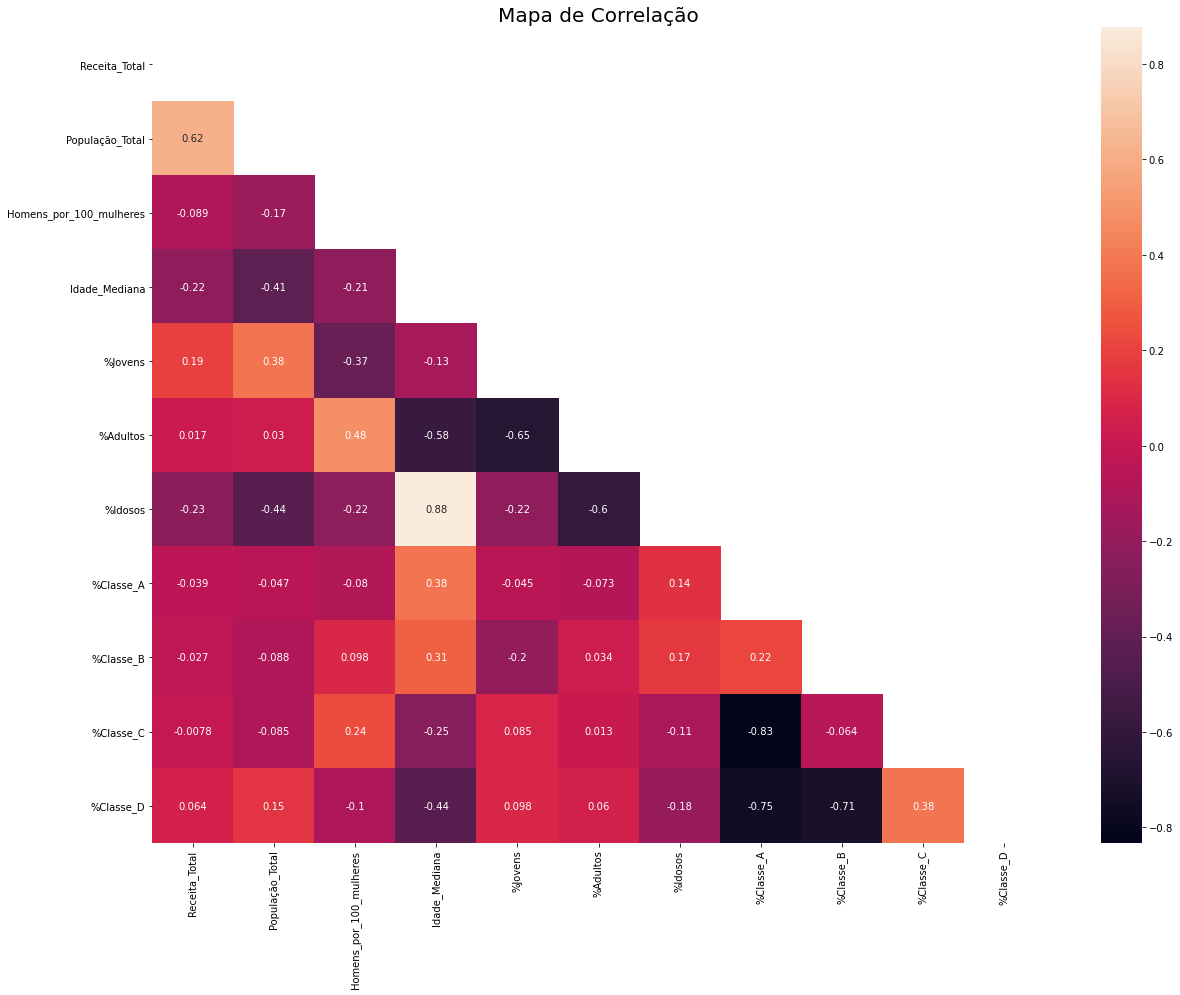

In [371]:
matriz_correlacao = df_analise.drop(columns = ["Zipcode"]).corr("pearson")

mask = np.zeros_like(matriz_correlacao)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (20, 15))
sns.heatmap(matriz_correlacao, mask = mask, annot = True)
plt.title("Mapa de Correlação", fontsize = 20)
plt.show()

In [381]:
# dataset para analisar os 25 melhores laboratórios

df_analise_top_25 = df_analise.sort_values(by = "Receita_Total", ascending = False).head(25)
df_analise_top_25.head()

,Receita_Total,Zipcode,População_Total,Homens_por_100_mulheres,Idade_Mediana,%Jovens,%Adultos,%Idosos,%Classe_A,%Classe_B,%Classe_C,%Classe_D
Id_Lab,,,,,,,,,,,,
L139,3.584282e+06,95823,79440,94.5,31.4,0.316100,0.526687,0.157213,0.048039,0.229650,0.346225,0.376086
L133,3.543414e+06,94565,97671,100.5,34.1,0.279080,0.569463,0.151457,0.148618,0.331818,0.296531,0.223033
L152,2.495644e+06,30096,68691,89.0,35.8,0.256074,0.587049,0.156876,0.103040,0.252081,0.362904,0.281975
L121,2.305905e+06,98008,25719,102.2,42.3,0.232863,0.536879,0.230258,0.397715,0.281526,0.200043,0.120716
L123,2.220654e+06,19143,64630,80.5,32.9,0.260313,0.546774,0.192914,0.042347,0.161421,0.291770,0.504462


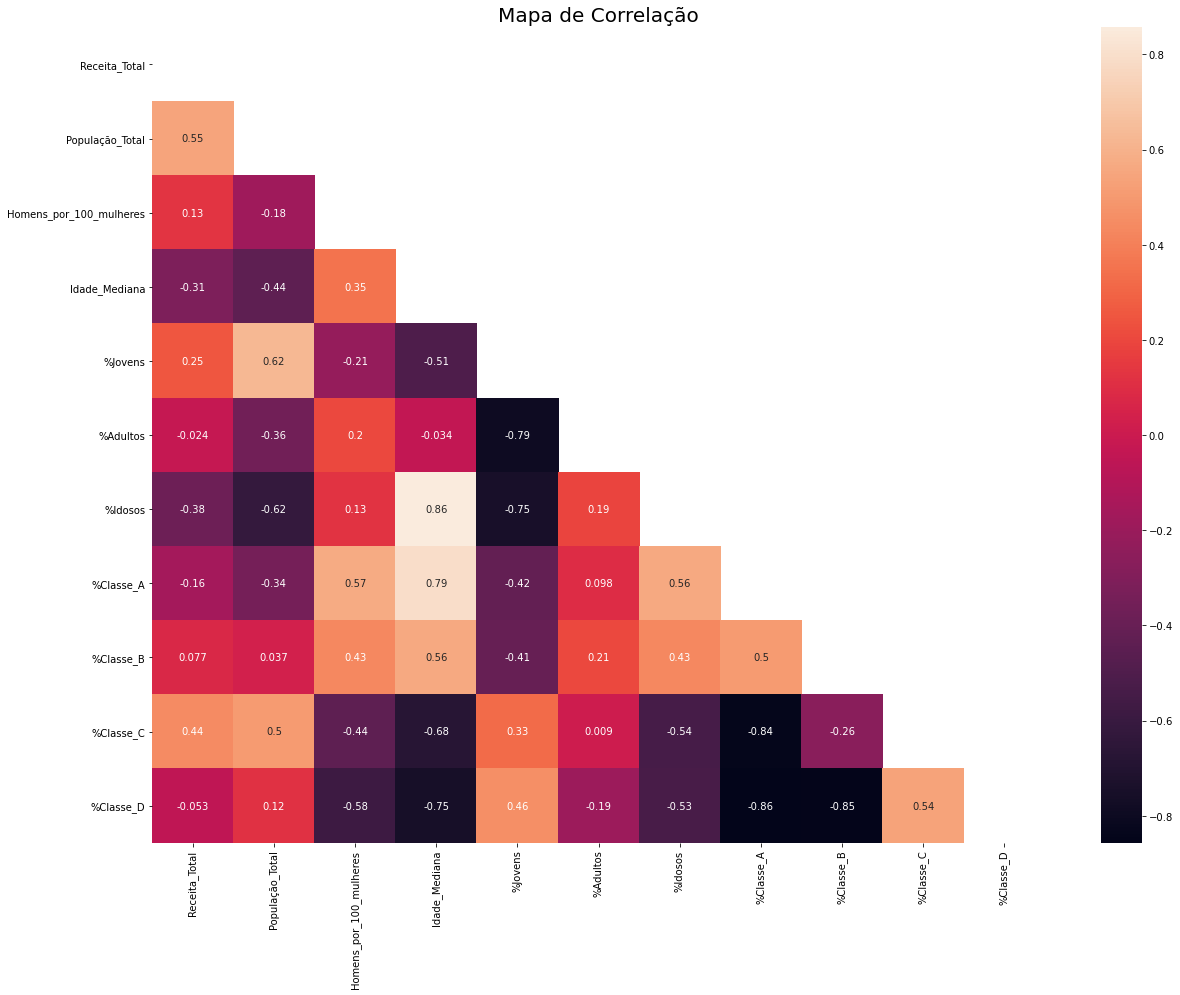

In [407]:
matriz_correlacao = df_analise_top_25.drop(columns = ["Zipcode"]).corr("pearson")

mask = np.zeros_like(matriz_correlacao)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (20, 15))
sns.heatmap(matriz_correlacao, mask = mask, annot = True)
plt.title("Mapa de Correlação", fontsize = 20)
plt.show()

In [415]:
# agrupar as faixas etárias em jovens, adultos e idosos

df_dados_demograficos_analise = df_dados_demograficos_limpo.copy()

df_dados_demograficos_analise["Jovens"] = df_dados_demograficos_analise["Menos_de_5_Anos"] + df_dados_demograficos_analise["5-9_Anos"] + df_dados_demograficos_analise["10-14_Anos"] + df_dados_demograficos_analise["15-19_Anos"]

df_dados_demograficos_analise["Adultos"] = df_dados_demograficos_analise["20-24_Anos"] + df_dados_demograficos_analise["25-34_Anos"] + df_dados_demograficos_analise["35-44_Anos"] + df_dados_demograficos_analise["45-54_Anos"] + df_dados_demograficos_analise["55-59_Anos"]

df_dados_demograficos_analise["Idosos"] = df_dados_demograficos_analise["60-64_Anos"] + df_dados_demograficos_analise["65-74_Anos"] + df_dados_demograficos_analise["75-84_Anos"] + df_dados_demograficos_analise["Mais_de_84_Anos"]

df_dados_demograficos_analise.drop(columns = ['Menos_de_5_Anos', '5-9_Anos', '10-14_Anos', '15-19_Anos', '20-24_Anos', '25-34_Anos', '35-44_Anos', '45-54_Anos', '55-59_Anos', '60-64_Anos', '65-74_Anos', '75-84_Anos', 'Mais_de_84_Anos'], inplace = True)

In [416]:
# proporção de jovens, adultos e idosos

df_dados_demograficos_analise["%Jovens"] = df_dados_demograficos_analise["Jovens"] / (df_dados_demograficos_analise["Jovens"] + df_dados_demograficos_analise["Adultos"] + df_dados_demograficos_analise["Idosos"])

df_dados_demograficos_analise["%Adultos"] = df_dados_demograficos_analise["Adultos"] / (df_dados_demograficos_analise["Jovens"] + df_dados_demograficos_analise["Adultos"] + df_dados_demograficos_analise["Idosos"])

df_dados_demograficos_analise["%Idosos"] = df_dados_demograficos_analise["Idosos"] / (df_dados_demograficos_analise["Jovens"] + df_dados_demograficos_analise["Adultos"] + df_dados_demograficos_analise["Idosos"])

df_dados_demograficos_analise.drop(columns = ["Jovens", "Adultos", "Idosos"], inplace = True)

In [421]:
df_dados_demograficos_analise.sort_values(by = ["População_Total"], ascending = False ).head()

,Id_Região,Área_Geográfica,População_Total,Homens_por_100_mulheres,Idade_Mediana,Zipcode,%Jovens,%Adultos,%Idosos
28338,8600000US77449,ZCTA5 77449,128294,91.5,31.7,77449,0.337529,0.559691,0.102780
28375,8600000US77494,ZCTA5 77494,118291,93.7,35.2,77494,0.353696,0.533718,0.112587
19135,8600000US11368,ZCTA5 11368,112088,109.4,32.9,11368,0.290379,0.577564,0.132057
29291,8600000US79936,ZCTA5 79936,111620,96.3,31.8,79936,0.294213,0.551666,0.154121
1885,8600000US90011,ZCTA5 90011,111165,102.3,28.7,90011,0.346935,0.554635,0.098430


In [423]:
# agrupar faixa de renda em classes

df_dados_economicos_analise = df_dados_economicos_limpo.copy()

df_dados_economicos_analise["Classe_A"] = df_dados_economicos_analise["$150.000-$199.999"] + df_dados_economicos_analise["Mais_de_$200.000"]

df_dados_economicos_analise["Classe_B"] = df_dados_economicos_analise["$75.000-$99.999"] + df_dados_economicos_analise["$100.000-$149.999"]

df_dados_economicos_analise["Classe_C"] = df_dados_economicos_analise["$35.000-$49.999"] + df_dados_economicos_analise["$50.000-$74.999"]

df_dados_economicos_analise["Classe_D"] = df_dados_economicos_analise["Menos_de_$10.000"] + df_dados_economicos_analise["$10.000-$14.999"] + df_dados_economicos_analise["$15.000-$24.999"] + df_dados_economicos_analise["$25.000-$34.999"]

df_dados_economicos_analise.drop(columns = ["Menos_de_$10.000", "$10.000-$14.999", "$15.000-$24.999", "$25.000-$34.999", "$35.000-$49.999", "$50.000-$74.999", "$75.000-$99.999", "$100.000-$149.999", "$150.000-$199.999", "Mais_de_$200.000"], inplace = True)

In [424]:
# proporção de classes

df_dados_economicos_analise["%Classe_A"] = df_dados_economicos_analise["Classe_A"] / (df_dados_economicos_analise["Classe_A"] + df_dados_economicos_analise["Classe_B"] + df_dados_economicos_analise["Classe_C"] + df_dados_economicos_analise["Classe_D"]) 

df_dados_economicos_analise["%Classe_B"] = df_dados_economicos_analise["Classe_B"] / (df_dados_economicos_analise["Classe_A"] + df_dados_economicos_analise["Classe_B"] + df_dados_economicos_analise["Classe_C"] + df_dados_economicos_analise["Classe_D"])

df_dados_economicos_analise["%Classe_C"] = df_dados_economicos_analise["Classe_C"] / (df_dados_economicos_analise["Classe_A"] + df_dados_economicos_analise["Classe_B"] + df_dados_economicos_analise["Classe_C"] + df_dados_economicos_analise["Classe_D"])

df_dados_economicos_analise["%Classe_D"] = df_dados_economicos_analise["Classe_D"] / (df_dados_economicos_analise["Classe_A"] + df_dados_economicos_analise["Classe_B"] + df_dados_economicos_analise["Classe_C"] + df_dados_economicos_analise["Classe_D"])

df_dados_economicos_analise.drop(columns = ["Classe_A", "Classe_B", "Classe_C", "Classe_D"], inplace = True) 

In [428]:
df_dados_economicos_analise.head()

,Id_Região,Área_Geográfica,Zipcode,%Classe_A,%Classe_B,%Classe_C,%Classe_D
0,8600000US35004,ZCTA5 35004,35004,0.066176,0.318772,0.381488,0.233564
1,8600000US35005,ZCTA5 35005,35005,0.034483,0.261772,0.339266,0.364479
2,8600000US35006,ZCTA5 35006,35006,0.056974,0.312377,0.324165,0.306483
3,8600000US35007,ZCTA5 35007,35007,0.078239,0.409169,0.325764,0.186827
4,8600000US35010,ZCTA5 35010,35010,0.062977,0.194817,0.321522,0.420684


In [431]:
df_local_analise = df_dados_demograficos_analise.drop(columns = ["Id_Região", "Área_Geográfica"]).merge(df_dados_economicos_analise.drop(columns = ["Id_Região", "Área_Geográfica"]), on = "Zipcode", how = "left")
df_local_analise.head()

,População_Total,Homens_por_100_mulheres,Idade_Mediana,Zipcode,%Jovens,%Adultos,%Idosos,%Classe_A,%Classe_B,%Classe_C,%Classe_D
0,12045,94.1,35.5,35004,0.270237,0.529680,0.200083,0.066176,0.318772,0.381488,0.233564
1,7344,86.1,44.0,35005,0.267838,0.459831,0.272331,0.034483,0.261772,0.339266,0.364479
2,2883,108.2,47.2,35006,0.236212,0.496705,0.267083,0.056974,0.312377,0.324165,0.306483
3,26332,95.0,37.7,35007,0.285850,0.528482,0.185668,0.078239,0.409169,0.325764,0.186827
4,20613,90.5,42.6,35010,0.239266,0.495270,0.265464,0.062977,0.194817,0.321522,0.420684


In [435]:
df_local_analise.sort_values(by = "População_Total", ascending = False).reset_index(drop = True).head(10)

,População_Total,Homens_por_100_mulheres,Idade_Mediana,Zipcode,%Jovens,%Adultos,%Idosos,%Classe_A,%Classe_B,%Classe_C,%Classe_D
0,128294,91.5,31.7,77449,0.337529,0.559691,0.102780,0.111129,0.409287,0.316554,0.163031
1,118291,93.7,35.2,77494,0.353696,0.533718,0.112587,0.439863,0.327902,0.144087,0.088148
2,112088,109.4,32.9,11368,0.290379,0.577564,0.132057,0.069605,0.278944,0.342297,0.309154
3,111620,96.3,31.8,79936,0.294213,0.551666,0.154121,0.063973,0.272992,0.384118,0.278918
4,111165,102.3,28.7,90011,0.346935,0.554635,0.098430,0.033766,0.196947,0.342242,0.427045
5,110029,95.8,31.2,60629,0.318343,0.534059,0.147597,0.050835,0.213080,0.334294,0.401792
6,108525,95.3,36.8,75034,0.312297,0.548721,0.138982,0.379519,0.307136,0.198103,0.115242
7,107796,98.8,35.2,11385,0.244629,0.598863,0.156509,0.143827,0.359257,0.274358,0.222557
8,107673,95.0,33.1,77084,0.308072,0.558079,0.133850,0.105923,0.326435,0.341714,0.225928
9,105458,100.1,33.3,91331,0.277675,0.571043,0.151283,0.112509,0.308824,0.318250,0.260417


# 5.0 RESULTADOS

Os três Zipcodes escolhidos foram: **77449, 11368 e 79936**

**Critérios:** 

1 - População_Total
2 - %Classe_C

*Não repetir a região*